# Mathematical Trading Strategies - Assignment 2

[What is EMA? How to Use Exponential Moving Average With Formula](https://www.investopedia.com/terms/e/ema.asp)
[How To Use a Moving Average to Buy Stocks](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)
[Exponential Moving Average Trading Strategy](https://www.netpicks.com/three-moving-average-crossover/)

The objective of this assignment is to analyze the NASDAQ and NSE indices to identify their correlation and establish potential lead-lag relationships. The next step is to code Keltner Channel, Bollinger Bands, and MACD indicators, determining the optimal parameters for these indicators on one of the indices, and generating buy and sell signals on the other index.
Note : Utilize the established relationship to determine which index should be used for parameter optimization and which one for trading purposes.

Tasks:

Correlation Analysis:
a) Collect historical data for NASDAQ and NSE indices.
b) Calculate the correlation coefficient between the two indices.
c) Analyze the strength and direction of the relationship.

Lead-Lag Relationship:
a) Identify potential lead-lag relationships between the indices.
b) Analyze data to determine consistent leading or lagging behavior.
c) Use the lead-lag relationship to determine the index to be used for parameter optimization.
d) Provide an explanation for choosing the index for parameter optimization

Indicator Coding:
a) Code Keltner Channel, Bollinger Bands, and MACD indicators.

Parameter Optimization:
a) Optimize parameters for the indicators on one index.
b) Use metrics coded in last assignment to evaluate your strategy.
c) Document the optimized parameters for future reference.

Signal Generation:
a) Apply optimized parameters to the other index.
b) Generate buy and sell signals using the indicators.
c) Record the signals, their respective dates and returns along with other metrics covered before.

In [1]:
import yfinance as yf

from datetime import datetime

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Task - 1 : Correlation Analysis

In [2]:
# df = pd.read_csv("./tmp/assignment2.csv")

In [3]:
nasdaq_df = yf.download("^IXIC", start="2010-01-01",end= "2023-05-01")
nasdaq_close = nasdaq_df["Close"]
nasdaq_close.head(1)

[*********************100%***********************]  1 of 1 completed


Date
2010-01-04    2308.419922
Name: Close, dtype: float64

In [4]:
nasdaq_close.describe()

count     3353.000000
mean      6606.100432
std       3754.337331
min       2091.790039
25%       3340.620117
50%       5213.330078
75%       8506.209961
max      16057.440430
Name: Close, dtype: float64

In [5]:
nse_df = yf.download("^NSEI", start="2010-01-01",end= "2023-05-01")
nse_close = nse_df["Close"]
nse_close.head(1)

[*********************100%***********************]  1 of 1 completed


Date
2010-01-04    5232.200195
Name: Close, dtype: float64

In [6]:
nse_close.describe()

count     3268.000000
mean      9601.913283
std       3981.700799
min       4544.200195
25%       5975.737305
50%       8604.725098
75%      11515.425049
max      18812.500000
Name: Close, dtype: float64

In [7]:
# concatenate the two series to use the pandas df.corr() method to calculate corr coeff
df = pd.DataFrame({"NASDAQ": nasdaq_close,
                   "NSE": nse_close,
            },
                  index = nasdaq_close.index
        )
df.head(1)

,NASDAQ,NSE
Date,,
2010-01-04,2308.419922,5232.200195


In [8]:
df["NASDAQ_returns"] = df["NASDAQ"].pct_change()
df["NSE_returns"] = df["NSE"].pct_change()
df.head()

,NASDAQ,NSE,NASDAQ_returns,NSE_returns
Date,,,,
2010-01-04,2308.419922,5232.200195,NaN,NaN
2010-01-05,2308.709961,5277.899902,0.000126,0.008734
2010-01-06,2301.090088,5281.799805,-0.003300,0.000739
2010-01-07,2300.050049,5263.100098,-0.000452,-0.003540
2010-01-08,2317.169922,5244.750000,0.007443,-0.003487


In [9]:
df.shape

(3353, 4)

In [10]:
round(df.corr().iloc[2,3],3)

0.243

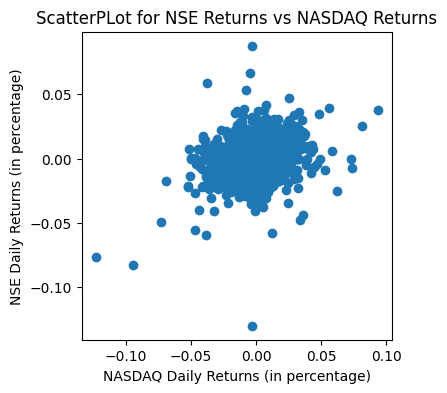

In [11]:
plt.figure(figsize=(4, 4))
plt.scatter(df.NASDAQ_returns,df.NSE_returns)
plt.xlabel("NASDAQ Daily Returns (in percentage)")
plt.ylabel("NSE Daily Returns (in percentage)")
plt.title("ScatterPLot for NSE Returns vs NASDAQ Returns")
plt.show()

Both the indices have a have a weak **Positive Correlation**

## Task - 2 : Lead - Lag Relationship

In [12]:
df.NASDAQ_returns.corr(df.NSE_returns.shift(-1))

0.2735643561326504

In [13]:
corr = pd.DataFrame(
    columns=["Lag(Days)",
             "Correlation bw NSE(lag) and NASDAQ",
             "Correlation bw NASDAQ(lag) and NSE"]
)

for lag in range(1,21):

    new_row = pd.Series(
        [
            lag,
            df.NASDAQ_returns.corr(df.NSE_returns.shift(lag)),
            df.NSE_returns.corr(df.NASDAQ_returns.shift(lag))
        ],
        index= corr.columns
    )

    corr = pd.concat([corr, new_row.to_frame().T], ignore_index=True)

In [14]:
corr.describe()

,Lag(Days),Correlation bw NSE(lag) and NASDAQ,Correlation bw NASDAQ(lag) and NSE
count,20.00000,20.000000,20.000000
mean,10.50000,-0.003213,0.017813
std,5.91608,0.033306,0.073080
min,1.00000,-0.075968,-0.072390
25%,5.75000,-0.023107,-0.021899
50%,10.50000,-0.001863,0.008545
75%,15.25000,0.022982,0.046940
max,20.00000,0.058833,0.273564


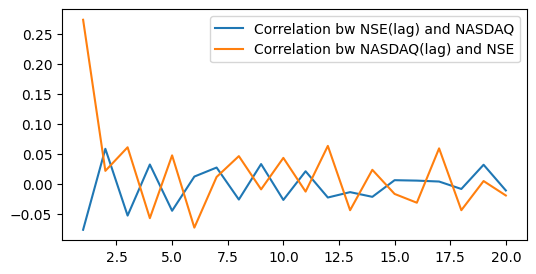

In [15]:
plt.figure(figsize=(6, 3))
plt.plot(corr.iloc[:,0],corr.iloc[:,1],label="Correlation bw NSE(lag) and NASDAQ")
plt.plot(corr.iloc[:,0],corr.iloc[:,2],label="Correlation bw NASDAQ(lag) and NSE")
plt.legend()
plt.show()

We can clearly see NASDAQ Follows NSE by 1 day

Plotting the data of NASDAQ and NSE

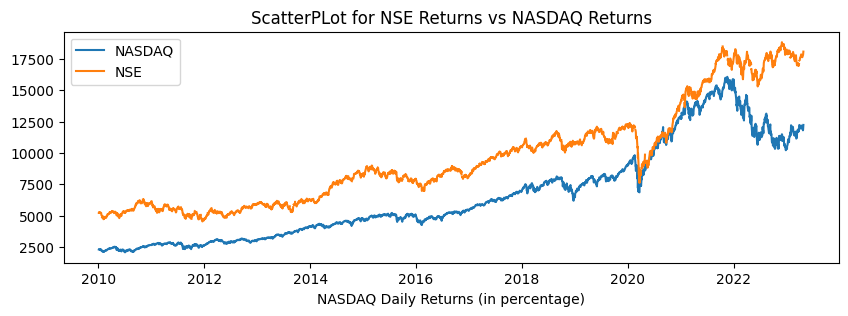

In [16]:
plt.figure(figsize=(10, 3))

plt.plot(df.NASDAQ.index, df.NASDAQ, label= "NASDAQ")
plt.plot(df.NSE.index, df.NSE, label= "NSE")

plt.legend()
plt.xlabel("NASDAQ Daily Returns (in percentage)")
plt.title("ScatterPLot for NSE Returns vs NASDAQ Returns")
plt.show()

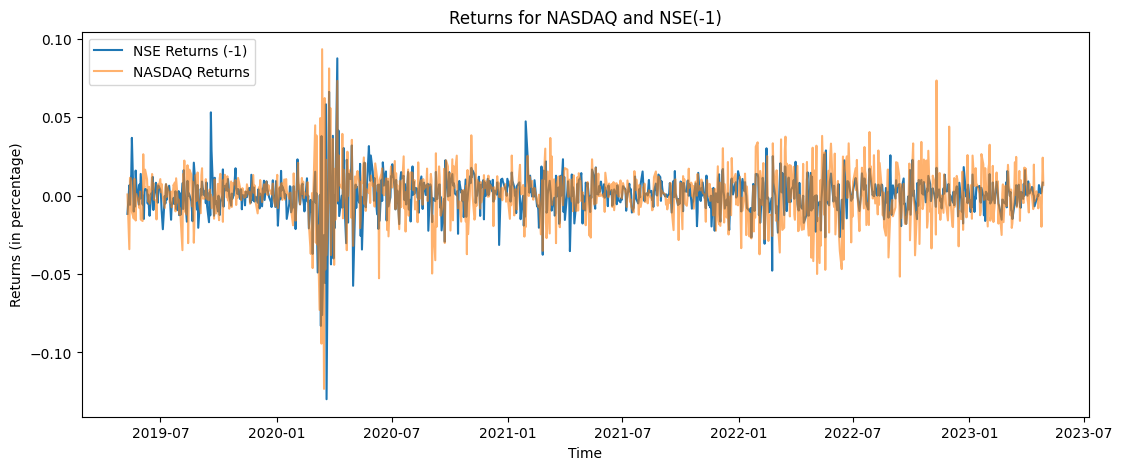

In [17]:
df_recent = df[-1000:]

plt.figure(figsize=(13,5))
plt.plot(df_recent.index, df_recent.NSE_returns.shift(-1),label="NSE Returns (-1)")
plt.plot(df_recent.index,df_recent.NASDAQ_returns,alpha=0.6,label= "NASDAQ Returns")
plt.legend()
plt.ylabel("Returns (in percentage)")
plt.xlabel("Time")
plt.title("Returns for NASDAQ and NSE(-1)")
plt.show()

Now as NSE appears to weakly follow NASDAQ, I will take NASDAQ for parameter optimisation and will generate buy and sell signals using NSE data

## Task - 3 : Indicator Coding

In [18]:
def calculate_keltner_channel(dataframe, period=20, multiplier=2):
    high = dataframe['High']
    low = dataframe['Low']
    close = dataframe['Close']

    tr = pd.DataFrame(index=dataframe.index)
    tr['h-l'] = high - low
    tr['h-pc'] = abs(high - close.shift(1))
    tr['l-pc'] = abs(low - close.shift(1))

    true_range = tr.max(axis=1)
    atr = true_range.rolling(window=period).mean()

    upper_band = close.rolling(window=period).mean() + (multiplier * atr)
    lower_band = close.rolling(window=period).mean() - (multiplier * atr)

    return upper_band, lower_band

In [19]:
date_from = "2021-01-01"
nasdaq_df_recent = nasdaq_df[datetime.strptime(date_from, "%Y-%m-%d").date():datetime.today().date()]

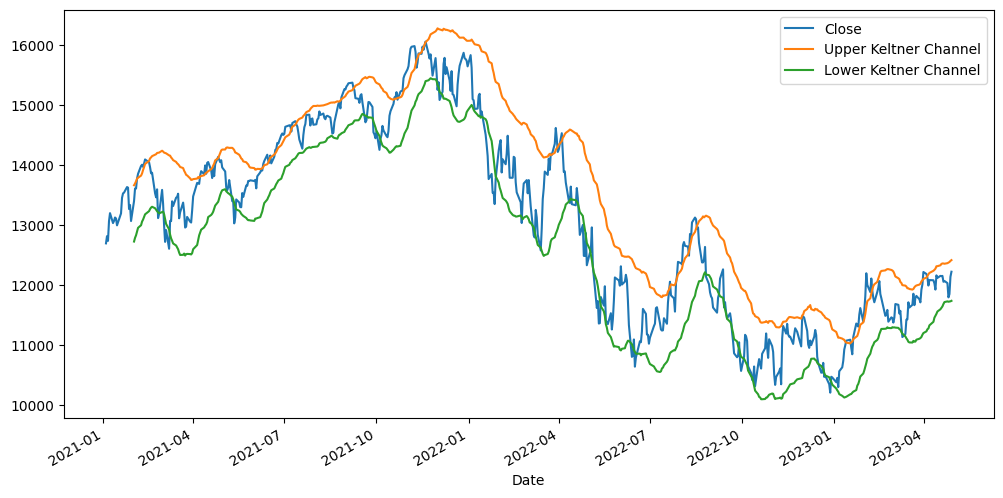

In [20]:
plt.figure(figsize=(12, 6))
upper_keltner, lower_keltner = calculate_keltner_channel(nasdaq_df_recent)
nasdaq_df_recent['Close'].plot(label='Close')
upper_keltner.plot(label='Upper Keltner Channel')
lower_keltner.plot(label='Lower Keltner Channel')
plt.legend()
plt.show()

In [21]:
def calculate_bollinger_bands(dataframe, period=20, multiplier=2):
    sma = dataframe['Close'].rolling(window=period).mean()
    rolling_std = dataframe['Close'].rolling(window=period).std()
    upper_band = sma + (multiplier * rolling_std)
    lower_band = sma - (multiplier * rolling_std)
    return upper_band, lower_band

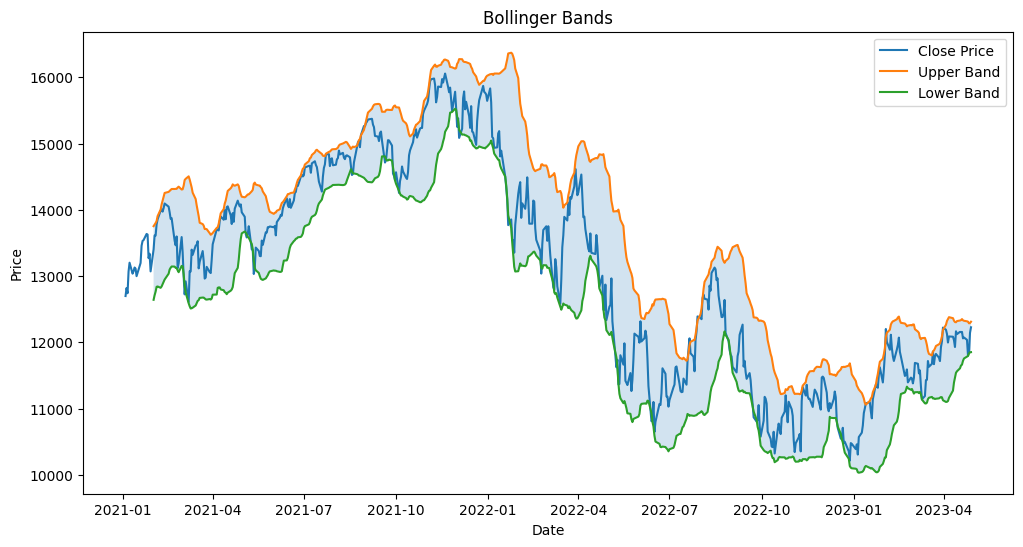

In [22]:
# Calculate Bollinger Bands
upper_bollinger, lower_bollinger = calculate_bollinger_bands(nasdaq_df_recent)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_df_recent['Close'], label='Close Price')
# plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(upper_bollinger, label='Upper Band')
plt.plot(lower_bollinger, label='Lower Band')
plt.fill_between(nasdaq_df_recent.index, lower_bollinger, upper_bollinger, alpha=0.2)  # Fill between the bands
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
def create_macd(dataframe):
    ema_short = dataframe['Close'].ewm(span=12).mean()
    ema_long = dataframe['Close'].ewm(span=26).mean()
    macd = ema_long - ema_short
    signal = macd.ewm(span=9).mean()
    histogram = macd - signal

    return macd, signal, histogram

In [24]:
date_from = "2023-01-01"
nasdaq_df_recent = nasdaq_df[datetime.strptime(date_from, "%Y-%m-%d").date():datetime.today().date()]

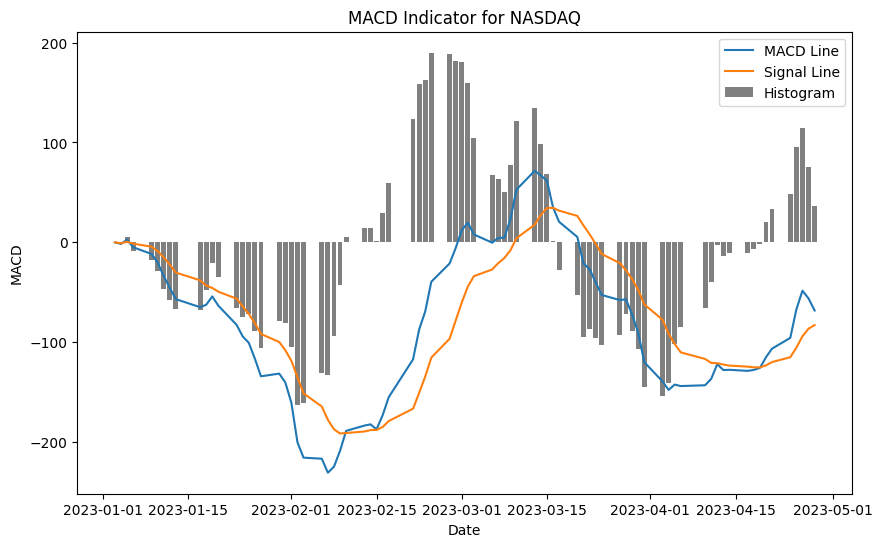

In [25]:
macd_line, signal_line, macd_histogram = create_macd(nasdaq_df_recent)

plt.figure(figsize=(10, 6))
plt.plot(nasdaq_df_recent.index, macd_line, label='MACD Line')
plt.plot(nasdaq_df_recent.index, signal_line, label='Signal Line')
plt.bar(nasdaq_df_recent.index, macd_histogram*2.5, label='Histogram', color='gray')
plt.legend()
plt.title('MACD Indicator for NASDAQ')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.show()

## Task - 4 : Parameter Optimisation